In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# ✅ データの前処理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ✅ データセットのダウンロード
train_dataset = torchvision.datasets.MNIST(root="../data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="../data", train=False, transform=transform, download=True)

# ✅ DataLoader でバッチ処理
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [2]:
import torch.nn as nn
import torch.nn.functional as F

# ✅ CNN モデルを定義
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)  # 28x28 → 28x28
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # 28x28 → 14x14
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)  # 14x14 → 14x14
        self.fc1 = nn.Linear(16 * 7 * 7, 128)  # 全結合層
        self.fc2 = nn.Linear(128, 10)  # 出力層（10クラス分類）

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 畳み込み → ReLU → プーリング
        x = self.pool(F.relu(self.conv2(x)))  # 畳み込み → ReLU → プーリング
        x = torch.flatten(x, 1)  # 2D を 1D に変換
        x = F.relu(self.fc1(x))  # 全結合層
        x = self.fc2(x)  # 出力層
        return x

# ✅ モデルをインスタンス化
model = SimpleCNN()
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ✅ 学習ループ（損失 & 精度を記録）
num_epochs = 5
train_losses = []
train_accuracies = []

In [4]:
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch [1/5], Loss: 0.2634, Accuracy: 92.74%
Epoch [2/5], Loss: 0.0744, Accuracy: 97.73%
Epoch [3/5], Loss: 0.0525, Accuracy: 98.40%
Epoch [4/5], Loss: 0.0403, Accuracy: 98.77%
Epoch [5/5], Loss: 0.0336, Accuracy: 99.00%


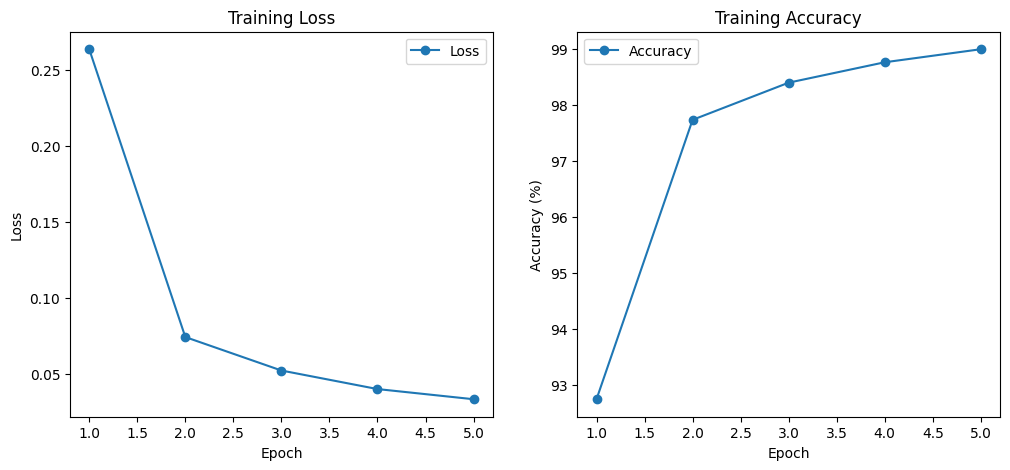

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o', label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o', label="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy")
plt.legend()

plt.show()

In [6]:
torch.save(model.state_dict(), "models/nist_cnn.pth")
print("✅ モデルを保存しました！")

✅ モデルを保存しました！


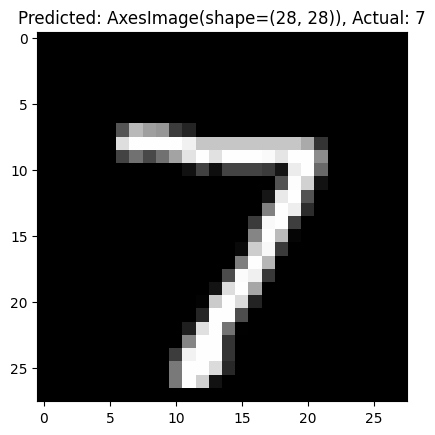

In [ ]:
import numpy as np

sample_image, sample_label = test_dataset[0]

model.eval()

with torch.no_grad():
    output = model(sample_image.unsqueeze(0))  # バッチ次元を追加
    predicted_label = plt.imshow(sample_image.squeeze(), cmap="gray")
    

plt.imshow(sample_image.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_label}, Actual: {sample_label}")
plt.show()

ここからはハイパーパラメータの調節を学ぶ

In [9]:
# ✅ 学習率を変更して実験
learning_rates = [0.0005, 0.001, 0.01]

for lr in learning_rates:
    print(f"\n🔥 学習率 {lr} で学習開始！\n")
    
    # ✅ モデルの初期化
    model = SimpleCNN()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # ✅ 学習ループ
    num_epochs = 5
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        avg_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

    print("\n✅ 学習完了！次の `lr` に進む！")



🔥 学習率 0.0005 で学習開始！

Epoch [1/5], Loss: 0.4062, Accuracy: 88.25%
Epoch [2/5], Loss: 0.1021, Accuracy: 96.93%
Epoch [3/5], Loss: 0.0731, Accuracy: 97.86%
Epoch [4/5], Loss: 0.0583, Accuracy: 98.21%
Epoch [5/5], Loss: 0.0484, Accuracy: 98.51%

✅ 学習完了！次の `lr` に進む！

🔥 学習率 0.001 で学習開始！

Epoch [1/5], Loss: 0.2273, Accuracy: 93.40%
Epoch [2/5], Loss: 0.0686, Accuracy: 97.86%
Epoch [3/5], Loss: 0.0468, Accuracy: 98.51%
Epoch [4/5], Loss: 0.0365, Accuracy: 98.83%
Epoch [5/5], Loss: 0.0284, Accuracy: 99.07%

✅ 学習完了！次の `lr` に進む！

🔥 学習率 0.01 で学習開始！

Epoch [1/5], Loss: 0.1984, Accuracy: 93.75%
Epoch [2/5], Loss: 0.0873, Accuracy: 97.26%
Epoch [3/5], Loss: 0.0772, Accuracy: 97.60%
Epoch [4/5], Loss: 0.0698, Accuracy: 97.90%
Epoch [5/5], Loss: 0.0680, Accuracy: 97.95%

✅ 学習完了！次の `lr` に進む！


In [ ]:
# ✅ バッチサイズのリスト
batch_sizes = [32, 64, 128]

for batch_size in batch_sizes:
    print(f"\n🔥 バッチサイズ {batch_size} で学習開始！\n")
    
    # ✅ DataLoader を作り直す
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # ✅ モデルの初期化
    model = SimpleCNN()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # ✅ 学習ループ
    num_epochs = 5
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        avg_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

    print("\n✅ 学習完了！次の `batch_size` に進む！")




🔥 バッチサイズ 32 で学習開始！

Epoch [1/5], Loss: 0.2045, Accuracy: 93.89%
Epoch [2/5], Loss: 0.0634, Accuracy: 98.11%
Epoch [3/5], Loss: 0.0448, Accuracy: 98.62%
Epoch [4/5], Loss: 0.0341, Accuracy: 98.93%
Epoch [5/5], Loss: 0.0267, Accuracy: 99.13%

✅ 学習完了！次の `batch_size` に進む！

🔥 バッチサイズ 64 で学習開始！

Epoch [1/5], Loss: 0.2375, Accuracy: 93.12%
Epoch [2/5], Loss: 0.0636, Accuracy: 98.01%
Epoch [3/5], Loss: 0.0462, Accuracy: 98.59%
Epoch [4/5], Loss: 0.0351, Accuracy: 98.88%
Epoch [5/5], Loss: 0.0294, Accuracy: 99.02%

✅ 学習完了！次の `batch_size` に進む！

🔥 バッチサイズ 128 で学習開始！

Epoch [1/5], Loss: 0.3761, Accuracy: 89.52%
Epoch [2/5], Loss: 0.0876, Accuracy: 97.45%
Epoch [3/5], Loss: 0.0601, Accuracy: 98.18%
Epoch [4/5], Loss: 0.0487, Accuracy: 98.52%
Epoch [5/5], Loss: 0.0405, Accuracy: 98.74%

✅ 学習完了！次の `batch_size` に進む！


データ拡張を学ぶ

In [12]:
import torchvision.transforms as transforms

# ✅ データ拡張を追加！
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 左右反転
    transforms.RandomRotation(10),  # ±10度の範囲でランダム回転
    transforms.RandomAffine(10, translate=(0.1, 0.1)),  # 平行移動 & 回転
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # 明るさ・コントラストの変化
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ✅ データセットの更新
train_dataset = torchvision.datasets.MNIST(root="../data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


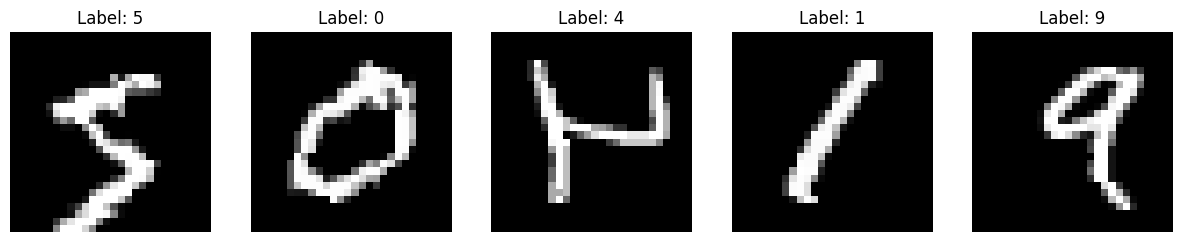

In [13]:
import matplotlib.pyplot as plt

# ✅ 変換後の画像を可視化
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")

plt.show()

In [14]:
# ✅ モデルの初期化
model = SimpleCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ✅ 学習ループ
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("\n✅ 学習完了！データ拡張の効果を確認しよう！")


Epoch [1/5], Loss: 0.6928, Accuracy: 76.86%
Epoch [2/5], Loss: 0.3060, Accuracy: 90.25%
Epoch [3/5], Loss: 0.2293, Accuracy: 92.93%
Epoch [4/5], Loss: 0.1918, Accuracy: 94.14%
Epoch [5/5], Loss: 0.1695, Accuracy: 94.66%

✅ 学習完了！データ拡張の効果を確認しよう！
